In [1]:
import pandas as pd
from module.function import *
from module.learning import *
import tensorflow as tf

C:\Users\SEO09\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from Crawl import *

In [3]:
coin_list = 'TRX,NEO,BLZ,ICX,EOS,VEN,XRP,ADA,XLM,FUN,BNB,DGD,LTC,IOTA,CTR,WTC,CND,QSP,OMG,PPT,ZRX,IOST,GXS,XVG,BQX,LSK,REQ,POWR,POE,ELF,QTUM,ENG,BTS,AION,XMR,VIBE,SNT,KNC,ETC,MANA,VIB,LEND,SUB,OST,SALT,ZEC,ENJ,NEBL,HSR,NULS,LINK,BCD,LRC,WABI,TNB,GTO,ARK,TRIG,DASH,APPC,STRAT,MTL,SNGLS,MDA,INS,GVT,TNT,AST,BAT,BTG,MCO,CDT,LUN,ARN,AMB,WAVES,ADX,FUEL,BRD,RCN,XZC,MOD,NAV,EVX,DNT,KMD,BNT,ICN,BCPT,STORJ,DLT,EDO,WINGS,SNM,MTH,OAX,YOYO'.split(',')

In [4]:
coin_dict = {}
for i in coin_list:
    coin_dict[i] = pd.read_csv('data_csv/data_{}_KRW.csv'.format(i)).drop(['Unnamed: 0'], axis = 1)

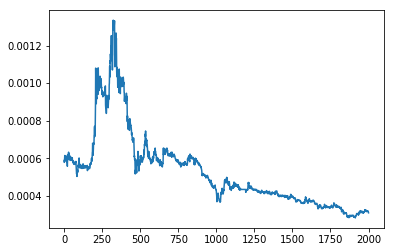

In [5]:
plt.close()
plt.plot(coin_dict['ADA'].close)
plt.show()

In [6]:
ada = coin_dict['ADA']

In [7]:
price = np.array(ada.close) + np.array(1e-7)
volume = np.array(ada.volumeto) + np.array(1e-7)

In [8]:
interval = 24
price_del = [(price[i+interval]-price[i])*100/price[i] for i in range(len(price)-interval)] # 가격 변화율
volume_del = [(volume[i+interval]-volume[i])*100/volume[i] for i in range(len(volume)-interval)] # 거래량 변화율
price_std = [np.std(price[i:i+interval])*100/np.mean(price[i:i+interval]) for i in range(len(price)-interval)] # 가격변화율 표준편차
volume_std = [np.std(volume[i:i+interval])*100/np.mean(volume[i:i+interval]) for i in range(len(volume)-interval)] # 거래량 변화율 표준편차

In [9]:
seq_length = 24 # batch size
data_dim = 4 # 입력 데이터가 몇개인가? 여기서는 네개(가격변화율, 거래량변화율, 가격표편, 거래량표편)
output_dim = 1 # 다음시간째(25)가격 상승률을 출력
hidden_dim = 20 # 뉴런 수

In [10]:
x = np.array([price_del, volume_del, price_std, volume_std]).T # 학습에 쓰이는 데이터
y = np.array(price_del[1:]) #답(24시간동안의 양상을 바탕으로 다음 1시간후(25시간)의 상승률)

In [11]:
dataX = []
dataY = []
for i in range(len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i]
    dataX.append(_x) # data with previous data
    dataY.append(_y) # label

In [12]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataX)])

In [20]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None,1])

In [14]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, state_is_tuple = True)
output, state = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(output[:,-1], output_dim, activation_fn = None)

In [15]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))

opt = tf.train.AdamOptimizer(0.01)
train = opt.minimize(loss)

In [16]:
print('start learning')
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('initialized')

start learning
initialized


In [21]:
for i in range(2000):
    tr, l = sess.run([train, loss], feed_dict = {X: trainX, Y: trainY})
    if i%100 == 0:
        print('cycle {} of 2000 done \r'.format(i))

ValueError: Cannot feed value of shape (1366,) for Tensor 'Placeholder_5:0', which has shape '(?, 1)'

In [105]:
trainX.shape

(1366, 24, 4)

In [106]:
trainY.shape

(1366,)

In [117]:
np.array(np.array(price_del[1:])).shape

(1976,)

In [115]:
np.array([price_del[1:]]).shape

(1, 1976)